In [63]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import time
import MeCab

mpl.rcParams['axes.unicode_minus'] = False #한글폰트로 바꿨을 때 마이너스 폰트 깨짐 방지

In [5]:
driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(2)
driver.get("https://www.youtube.com/")

In [6]:
driver.find_element_by_xpath('//*[@id="contents"]/ytd-rich-item-renderer[2]').click()

In [7]:
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")

while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
    time.sleep(1.0) 
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    if new_page_height == last_page_height: 
        break 
    last_page_height = new_page_height 

In [23]:
comments=[]
page = driver.page_source
soup = bs(page, 'lxml')
all_comments = soup.find_all(id='expander')
for comment in all_comments:
#    comment = comment.find(id='content-text')
    comment_lines = comment.find_all('span', {'class':"style-scope yt-formatted-string"})
    comment = ''
    for line in comment_lines:
        comment += line.text.strip() + ' '
    if len(comment) > 0:
        comments.append(comment)

In [24]:
print(comments)

['📪 웃찾사 배달왔어요~ 📪    🤞 남호연 띵작 <뿌리 없는 나무>   🤞 정말,, 기묘하죠? <기묘한이야기>   🤞 에이미 원조 <흔한남매>   🤞 고품격 거지 <강남거지>   🤞 줴훈줴훈~ <남자끼리>   🤞 일제강점기,, 모진 고문에도 굴하지 않는,, <역사 속 그날>   🤞 일단, 공부 잘하고 싶으면 보세요 <문과이과>   🤞 윤화, 니 민기쌤 좋아하냐? <콩닥콩닥 민기쌤>   🤞 내가 학교를 이렇게 다녔어야 했는데,, <호찬아>   🤞 나 오빠 2시간이나 기다렸어 <오빠가 너무해>   🤞 남자가 두근거릴 때...⭐️<남자의 심장>   🤞 인생 2회차 <윤화는 일곱살>  ', '이 코너가 그 레전드 그거잖아...  홍윤화가 대사 실수해서 민망해하면서 김민기한테 오빠가 틀렸다고 해~ 하니까 김민기가 네 제가 틀렸어요 죄송해요~ 한거ㅠㅠㅠㅠㅠㅠ ', '웃찾사는 진짜  1.뿌리없는나무  2.남자끼리  3.윤화는 일곱살  이거3개가 진짜 재밌었는디 ', ' 김민기 : 너 자꾸 TV보고 나쁜 거 따라하면  오빠가 진짜 콩-한다!  홍윤화 : 오빠가 콩하면 난 오빠를 딱 잡아가지고,  바닥에 탁 놓고,  밀대로 싹 밀어가지고,  오빠를 화살표로 탁탁탁 붙여놔 펌프로 만들어가지고,  다다단 단다라 단다라 딴딴딴딴 똰! 할거야.    우와! 좋아요 1000개 달성!!! ', '2020년에 보시는 분  👇  👇  👇  👇  👉👉👉👉👉👉👉👉출구♡ ', '오빠가 콩하멍 오빠를 탁잡아가지고 바닥에 탕놓고 밀대로 상밀어가지고 오빠를 화살표를 탁탁탁 묻혀다 펌프로 만들어 따다단다다다다단다다딴딴딴딴따딴 할꺼야ㅋㅋㅋㅋㅋㅋㅋㅋ ', '나여기부터 왤캐 웃기냨ㅋ ', '이때 우리는 몰랐다  저 둘이 남매에서 부부로 바뀔줄 몰랐다  그랬다,저 둘은 저때 사귀는 사이였다  저 연기력에 박수를  👏👏👏👏👏👏👏👏👏👏👏 ', '행사장풍선ㅋㅋㅋㅋ ', '김민기 : 너 자꾸 TV보고 나쁜 거 따라하면  오빠가 진짜 코옹!!!한다!  홍윤화 : 오빠가 코옹!!!!!!!!!!!!!!!하면 난 오빠를

In [26]:
def getNVM_lemma(text):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(text)
    word_tag = [w for w in parsed.split("\n")]
    pos = []
    tags = ['NNG', 'NNP', 'VV', 'VA', 'VX', 'VCP', 'VCN']
    for word_ in word_tag[:-2]:
        word = word_.split("\t")
        tag = word[1].split(",")
        if(tag[0] in tags):
            pos.append(word[0])
        elif('+' in tag[0]): #단어가 여러 형태소로 구성된 경우
            if('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                pos.append(t)
    return pos

def main():
    s = '우리는 가까워질 수 없기 때문에 가깝게 느껴지지 않는다'
    print(getNVM_lemma(s))
    
main()

['가깝', '없', '가깝', '느끼', '지', '않']


In [30]:
morphemes = []
for comment in comments:
    comment_morph = getNVM_lemma(comment)
    print(comment_morph)
    morphemes += comment_morph

['오', '찾', '배달', '오', '남호연', '작', '뿌리', '없', '나무', '이야기', '원조', '흔하', '남매', '고품격', '거지', '강남', '거지', '남자', '일제', '강점기', '모질', '고문', '굴하', '않', '역사', '속', '그날', '공부', '하', '싶', '보', '문', '이과', '윤화', '민기', '쌤', '좋', '하', '민기', '쌤', '학교', '다니', '하', '호', '찬', '오빠', '기다리', '오빠', '하', '남자', '두근거리', '때', '남자', '심장', '인생', '회차', '윤화']
['코너', '레전드', '홍윤화', '대사', '실수', '하', '김민기', '오빠', '틀리', '하', '하', '김민기', '틀리', '하']
['오', '찾', '뿌리', '없', '나무', '남자', '윤화', '재밌']
['김민기', '나쁘', '따르', '하', '오빠', '콩', '홍윤화', '오빠', '콩', '나', '오빠', '잡', '가지', '바닥', '놓', '밀대', '밀', '가지', '오빠', '화살표', '붙이', '놓', '펌프', '만들', '가지', '다단', '단다라', '단다라', '따', '하', '좋', '달성']
['보', '출구']
['오빠', '콩', '오빠', '잡', '가지', '바닥', '놓', '밀대', '상', '밀', '가지', '오빠', '화살표', '묻히', '펌프', '만들', '따', '하']
['웃']
['이때', '모르', '남매', '부부', '바뀌', '모르', '그러', '때', '사귀', '사이', '연기력', '박수']
['행사장', '풍선']
['김민기', '나쁘', '따르', '하', '오빠', '코', '옹', '홍윤화', '오빠', '코', '옹', '하', '나', '오빠', '잡', '가지', '바닥', '놓', '밀대', '밀', '가지', '오빠', '화살표', '붙이', '놓', '

In [47]:
morpheme_nums = {}
for i in morphemes:
    if i in morpheme_nums:
        morpheme_nums[i] += 1
    else:
        morpheme_nums.update({i:1})
morph_sorted = sorted(morpheme_nums.items(), key=(lambda x:x[1]), reverse = True)
print(morph_sorted, type(morph_sorted))

[('하', 23), ('오빠', 17), ('좋', 14), ('감사', 13), ('윤화', 11), ('가지', 9), ('오', 8), ('보', 6), ('놓', 6), ('따', 6), ('풍선', 6), ('때', 5), ('홍윤화', 5), ('김민기', 5), ('웃', 5), ('웃기', 5), ('같', 5), ('남매', 4), ('남자', 4), ('콩', 4), ('잡', 4), ('바닥', 4), ('밀대', 4), ('밀', 4), ('화살표', 4), ('단다라', 4), ('귀엽', 4), ('똑같', 4), ('찾', 3), ('흔하', 3), ('않', 3), ('속', 3), ('펌프', 3), ('만들', 3), ('모르', 3), ('사귀', 3), ('행사장', 3), ('주', 3), ('이', 3), ('ㄷ', 3), ('뿌리', 2), ('없', 2), ('나무', 2), ('거지', 2), ('문', 2), ('민기', 2), ('쌤', 2), ('틀리', 2), ('재밌', 2), ('나쁘', 2), ('따르', 2), ('나', 2), ('붙이', 2), ('다단', 2), ('사이', 2), ('코', 2), ('옹', 2), ('닼', 2), ('춤', 2), ('겁나', 2), ('캐릭', 2), ('옛날', 2), ('도', 2), ('살', 2), ('인줄', 2), ('뿜', 2), ('열', 2), ('언니', 2), ('초', 2), ('배달', 1), ('남호연', 1), ('작', 1), ('이야기', 1), ('원조', 1), ('고품격', 1), ('강남', 1), ('일제', 1), ('강점기', 1), ('모질', 1), ('고문', 1), ('굴하', 1), ('역사', 1), ('그날', 1), ('공부', 1), ('싶', 1), ('이과', 1), ('학교', 1), ('다니', 1), ('호', 1), ('찬', 1), ('기다리', 1), ('두근거리', 1), ('심장'

['NanumSquare_ac']


<BarContainer object of 20 artists>

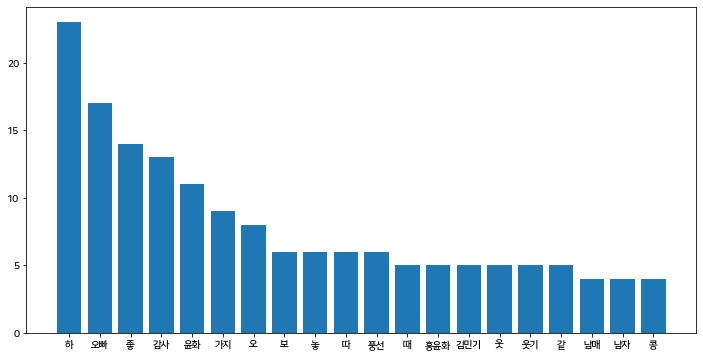

In [68]:
top20_keys = list(itertools.islice(morph_sorted, 20))
morph_top20 = {i: morph_sorted[i] for i in top20_keys}

plt.rc('font', family='NanumSquare_ac') # For Windows
print(plt.rcParams['font.family'])

fig = plt.figure(figsize = (12,6))

ax = fig.add_subplot(111)

ax.bar(*zip(*morph_sorted.items()))